# What are the important dependencies for predicting salary of employee's

In [1]:
# frist import dependencies
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
# encode the strings in the dataset
sales = df['sales'].unique()
salary = df['salary'].unique()

def encoder(df,column,uniques):
    i = 0
    for unique in uniques:
        df[column] = df[column].replace(unique,i)
        i = i + 1
encoder(df,'sales',sales)
encoder(df,'salary',salary)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [5]:
columnnames = ['satisfaction_level',
            'last_evaluation',
            'number_project',
            'average_montly_hours',
            'time_spend_company',
            'Work_accident',
            'promotion_last_5years',
            'sales',
            'salary']
data = df[columnnames]
labels = df['left']

In [6]:
forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=0)


forest.fit(data, labels)
importances = forest.feature_importances_
columns = df.columns.values.tolist()

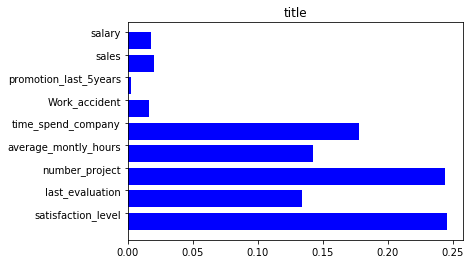

In [7]:
x = columnnames
y = importances

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')    
plt.show()